In [38]:
LON="--lon_range '(130.802, 130.90205)'"
LAT="--lat_range '(-12.41, -12.5113)'"
YEAR="--year_range 2000-2016"  # requirement mandatory
EPOCH="--epoch 5" #default epoch 2
PER="--per 25"  #Default percentage 10

DEB="--debug"   # To get detail of date/time and tide heights
# LS7FL="--ls7fl"  To include LS7 datasets

%run geomed_wf.py $LON $LAT $YEAR $PER $EPOCH 

Input date range 2000-2016
running task for epoch 2000-01-01 TO 2004-12-31 on percentile 25 tide post  for lon/lat range (130.802, 130.90205)(-12.41, -12.5113) epoch 5
 doing for sensor ls5_nbar_albers
 doing for sensor ls7_nbar_albers
 epoch end date is reset for LS7 2003/03/01
 doing for sensor ls8_nbar_albers
reading from tidal model file and using Haversine algorithm to extract shortest distance
Found tide post coordinates,depth and shortest distance ('130.87', '-12.24', '-816', 24.612725464254066)
received from predict tides  2017-02-16 09:55:48.253917
lowest tides range and number -2.36,-1.196 14
highest tides range and number 1.278,2.48 18
 loaded nbar data with low 09:55:48.421827
creating GEOMEDIAN for lower range 09:55:48.432135
creating GEOMEDIAN for higher range 09:56:49.328882
running task for epoch 2005-01-01 TO 2009-12-31 on percentile 25 tide post  for lon/lat range (130.802, 130.90205)(-12.41, -12.5113) epoch 5
 doing for sensor ls5_nbar_albers
 doing for sensor ls7_nb

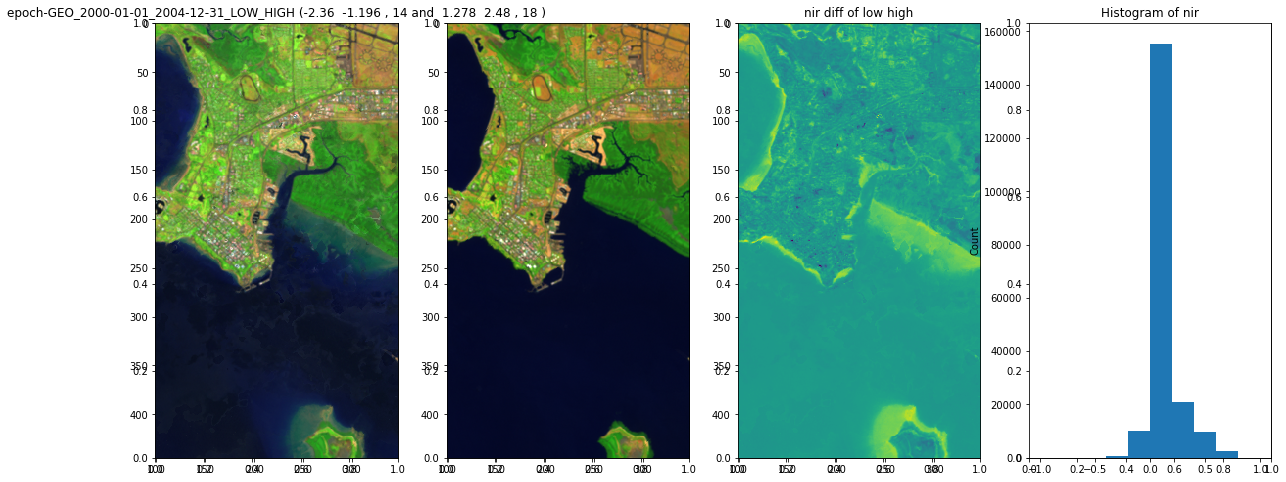

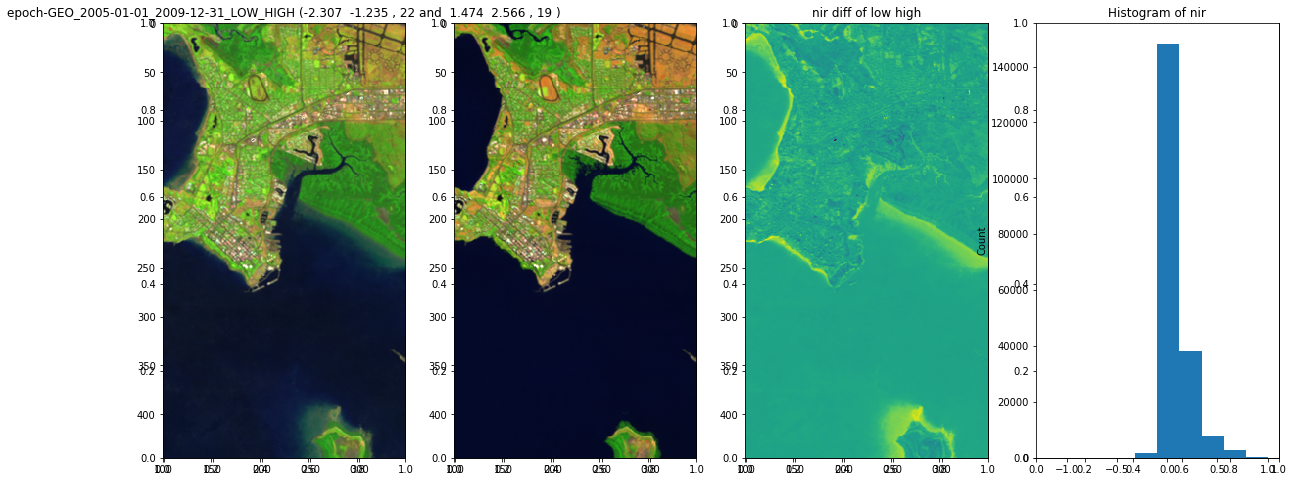

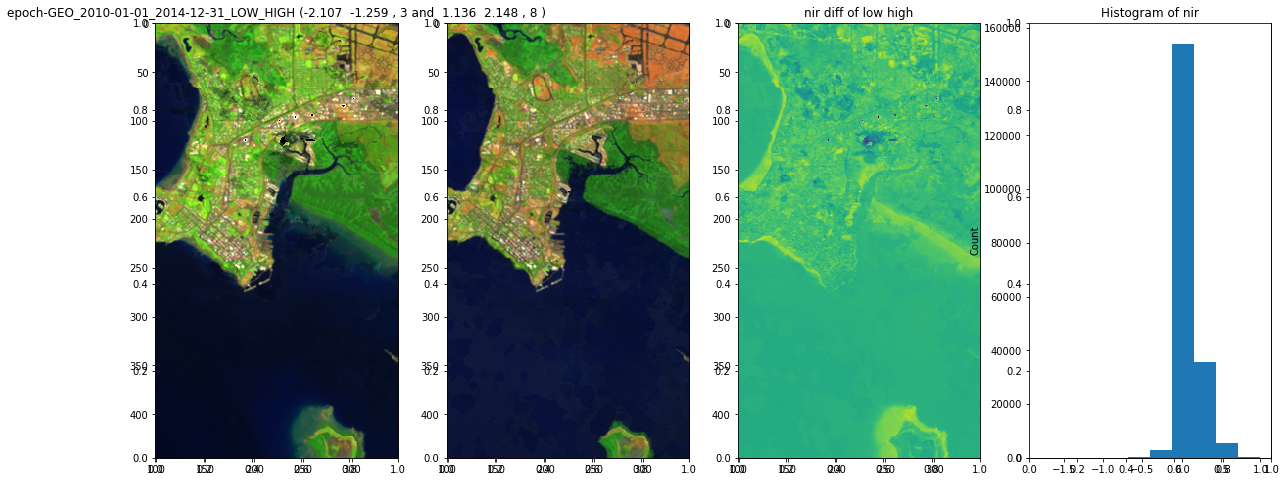

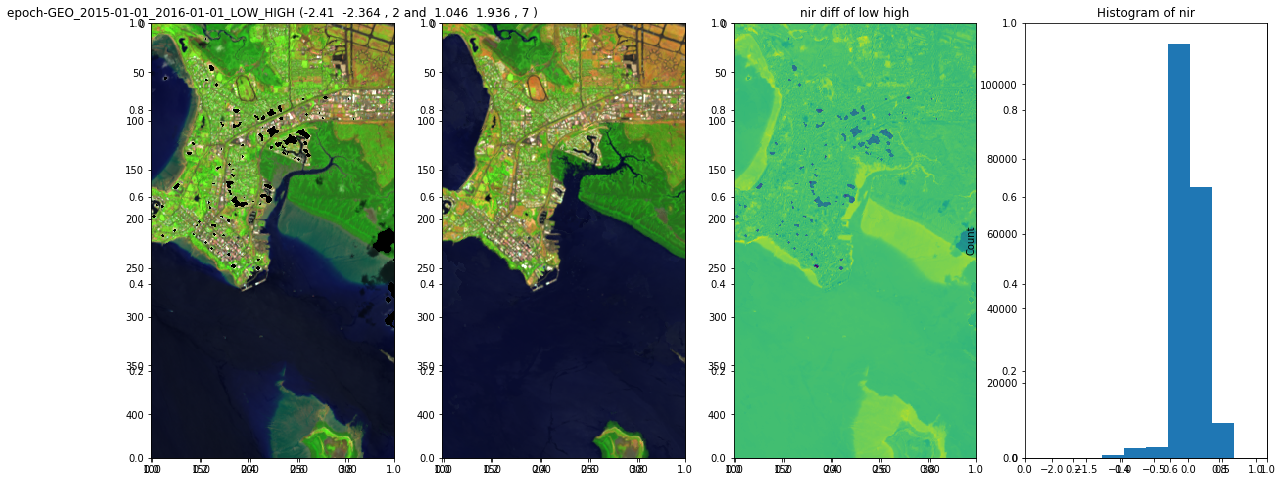

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

gs1 = GridSpec(1, 4)
fake_saturation = 4500
for k in sorted(MY_GEO.iterkeys()):
    if "HIGH" in k:
        high_dict  =  MY_GEO[k] 
        high_date_dict = MY_DATE[k]
        continue
    Z = high_dict.to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    scaled_high = (clipped_visible / max_val)    
    Z = MY_GEO[k].to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    scaled = (clipped_visible / max_val)
    
    fig, axes = plt.subplots(1,4, figsize=(20,8))
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1], sharey=ax1)
    ax3 = fig.add_subplot(gs1[2], sharey=ax1)
    ax4 = fig.add_subplot(gs1[3])
    
    nir_diff = MY_GEO[k].nir - high_dict.nir
    ax1.imshow(scaled, interpolation='nearest')
    ax1.set_title('epoch-'+k + "_HIGH (" + str(MY_DATE[k][0][1]) + "  " \
                  + str(MY_DATE[k][len(MY_DATE[k])-1][1]) + " , " + str(len(MY_DATE[k])) + " and  " + \
                  str(high_date_dict[0][1]) + "  " + str(high_date_dict[len(high_date_dict)-1][1]) +  \
                  " , " + str(len(high_date_dict)) + " )")
    ax2.imshow(scaled_high, interpolation='nearest')    
    clipped_visible = nir_diff.where(nir_diff<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    scaled = (clipped_visible / max_val)
    # plt.imshow(scaled, interpolation='nearest', cmap='BuGn')
    ax3.imshow(scaled)
    ax3.set_title('nir diff of low high')
   
    scaled.plot.hist(ax=ax4)
    #plt.xlim(100, 300)
    plt.show()